# Расчетное задание 1

## Идентификация сообщений, передаваемых по зашумленному каналу связи

### Часть 1. Последовательная передача одинаковых сообщений

#### 1.1. Определение переданного сообщения

##### Исходный алфавит

In [1]:
alphabet = {}
with open('alphabet.txt', encoding='utf8') as f:
    content = f.readlines()
    content = [x.rstrip().split('\t') for x in content]
    for pair in content:
        alphabet[pair[0]] = pair[1]
    print(alphabet)


{':': '1001111', 'З': '0010010', '3': '0000011', 'ы': '1000111', ')': '1010101', '0': '0000000', 'Л': '0010110', 'П': '0011010', 'М': '0010111', 'Я': '0101010', 'я': '1001011', 'ш': '1000100', 'х': '1000001', 'Ж': '0010001', 'ч': '1000011', 'Ь': '0100101', 'Б': '0001011', 'ф': '1000000', 'Й': '0010100', 'и': '0110100', '№': '1010011', 'Ц': '0100001', 'Н': '0011000', 'п': '0111011', 'л': '0110111', '9': '0001001', 'Щ': '0100100', 'б': '0101100', 'Ъ': '0100111', 'Т': '0011101', 'е': '0110000', 'э': '1001001', '6': '0000110', '2': '0000010', 'д': '0101111', 'з': '0110011', 'с': '0111101', 'Р': '0011011', 'К': '0010101', 'Д': '0001110', 'о': '0111010', 'к': '0110110', 'ъ': '1001000', 'Ы': '0100110', 'у': '0111111', 'щ': '1000101', 'У': '0011110', '(': '1010100', '8': '0001000', 'г': '0101110', 'Г': '0001101', 'в': '0101101', ',': '1001101', '5': '0000101', '?': '1010000', 'И': '0010011', '!': '1001110', 'Ш': '0100011', 'О': '0011001', '1': '0000001', 'м': '0111000', 'ё': '0110001', 'т': '0

In [2]:
def get_char(code: str):
    """Найти символ по его двоичному коду"""
    for key, value in alphabet.items():
        if value == code:
            return key


In [3]:
def get_sorted_keys():
    """Получить алфавит, отсортерованный по двоичному коду символов"""
    sorted_values = sorted(alphabet.values())
    sorted_keys = []
    for value in sorted_values:
        sorted_keys.append(get_char(value))
    return sorted_keys


Словарь априорных вероятностей:

In [4]:
priori = alphabet.copy()
n = len(alphabet)
p = 1 / n
for key, value in priori.items():
    priori[key] = p


Функция, находящая максимальное значение в словаре

In [5]:
def find_max(d: dict):
    """Найти в словаре ключ с максимальным значением"""
    return max(d, key=d.get)


##### Входные данные

In [6]:
with open('input.txt', encoding='utf8') as f:
    content = f.readlines()


Колличество букв в каждом сообщении равно $s$:

In [7]:
s = int(content[0].split(': ')[1])
print('s = {s}'.format(s=s))


s = 222


Вероятность искажения каждого отдельного символа (бита) равна $q$, вероятность правильной передачи $p = 1 - q$:

In [8]:
q = float(content[2].split(': ')[1])
p = 1 - q
print('p = {p}, q = {q}'.format(p=p, q=q))


p = 0.832, q = 0.168


Колличествно сообщений (посылок) равно $m$:

In [9]:
m = int(content[3].split(': ')[1])
print('m = {m}'.format(m=m))


m = 18


In [10]:
from probability import *

##### Все символы равновероятны

In [11]:
messages = []

for i in range(m):
    codes = content[i + 4].split(': ')[1].rstrip().split(' ')
    messages.append(codes)


In [12]:
chars = []  # вероятности появления каждого j-ого символа после i-ого сообщения
entropies = []  # значения энтропий каждого j-ого символа после i-ого сообщения
infos = []  # значения кол-ва информации об j-ом символе после i-ого сообщения

char_array = []  # инициализируем априорными вероятностями
for j in range(s):
    char = priori.copy()
    char_array.append(char)
chars.append(char_array)

for i in range(m):  # для каждого сообщения

    entropies_array = []
    info_array = []

    for j in range(s):  # для каждой буквы в сообщении
        entropies_array.append(find_cond_entropy(alphabet, chars[i][j], messages[i][j]))
        info_array.append(find_info(alphabet, chars[i][j], messages[i][j]))
        chars[i][j] = find_posterior_probs(alphabet, chars[i][j], messages[i][j])

    entropies.append(entropies_array)
    infos.append(info_array)

    if i != m - 1:  # априорное для следующего = апостериорное для текущего
        char_array = []
        for j in range(s):
            char = chars[i][j].copy()
            char_array.append(char)
        chars.append(char_array)


In [13]:
for i in range(m):
    print(i + 1, end=': ')
    for j in range(s):
        max_char = find_max(chars[i][j])
        print(max_char, end='')
    print()


1: 8:ЛДьэчимв 4зГЩр)ПизьдпПзж:_235ц1Ё ) вжчНН_пк ,кБНпыпЯлдчт_заяит пЯ гХНоиб(вевЯчтЮосйиёцуЗНитЩтисШ .ирелЬаМр3чЦТзШЬо,тча. Ял!Л:тжгЯ(ЯоПсебмеЯТ! про.йшат6(хУЙкРммвкеифКо ззЬа:и(й?ннелЯр.УА№ц(рЯсяЁрн7х кядя-_2!кА(и3елаю эдЗ.
2: Я:(Я6э3Лмв 4пдЩмчьиз6дПУЗз:_З7Ь25Зь:ЛвгШмП_птывйПмаБпЯзЪ№У зЯ!ит!по№геммиЬ.видЯяУмЯллиЖЛуЗЗикикисЦ )Ймиллп6бяыеЬЖа5Я,ицБш гл:Л:ЫпДЯ(ппПсёбпиЯТ: прП.ифатД)хДЗкнППбкеиш)н(зЗЬа:и(иЗМужлЯтшУ3хШЛбЯТяетн3х еадЯееч.Ля)сБХлаю(,дЗ,
3: !, ДьэчЛмв 4ауЩм, изшгттпз:_23Ьъ5Зь,УвЧШмжжно вкорпьпЯлучт жачет по№геориЩьвжрЯятнойтеЖыуЛЗеЫЩтисЮ (имикла рБяЦсзаво,ича. Азя ,тоДо потрертегс: пробе4ать)хти птмвтейфй? зРдпчи к(суелЯть 2-ШЛрЯсчетн7х жадэния. Я(сБжлаю ,дП.
4: г:(ДьячЛов 4адим: из Ыттпз:_Ч35ъ5З6, вЧамжжсо(вкорп пмлу№т(зачетьпо теориЩьЮжрЯятнойуеЖ уЛЗикЩтинЮ )йрикла СБяХсйаво,ица, ДляЛ,того потржбуегс: прпбешать)хти птмстейши? зБЫачи к(суелЯть 2-ШЛрЯсхетныщ задЮния. я(сБжлаю(,уПД
5: г, ДьячЛов 4ауим, из гттпз: 23Ь81_6, вжамжжно вкоро получу зачет по теорииьЮжроятнойтеК у Пик

In [14]:
import matplotlib.pyplot as plt
from matplotlib import rc

font = {'family': 'Arial', 'weight': 'normal'}
rc('font', **font)

for i in range(m):  # для каждого сообщения
    char_num = 7
    curr = chars[i][char_num]

    sorted_keys = get_sorted_keys()
    sorted_values = []
    for key in sorted_keys:
        sorted_values.append(curr[key])

    fig = plt.figure(figsize=(11, 7))
    plt.bar(range(len(alphabet)), sorted_values, align='center')
    plt.xticks(range(len(curr)), sorted_keys)
    plt.xlabel('$x$', fontsize=20, labelpad=20)
    plt.ylabel('$P(x)$', fontsize=20, labelpad=20)
    plt.tick_params(labelsize=9, pad=10)
    plt.title('Распределение вероятностей {0}-ой буквы сообщения после {1}-ой посылки'.format(char_num, i + 1), fontsize=15)
    plt.tight_layout()
    plt.xlim([0, len(curr)])
    plt.ylim([0, 1])
    plt.tight_layout()
    #plt.savefig('./pics/uniform{i}.png'.format(i=i+1))
    #plt.show()
    plt.close(fig)


##### Вероятности задаются исходя из частоты встречания букв в русском языке

In [15]:
with open('frequencies.txt', encoding='utf8') as f:
    content = f.readlines()
    frequncies = {}
    content = [x.rstrip().split('\t') for x in content] 
    for pair in content:
        frequncies[pair[0]] = float(pair[1])
        
print(frequncies)


{'б': 1.51, 'в': 4.19, 'й': 1.31, 'ч': 1.27, 'ы': 2.11, 'ф': 0.4, 'ь': 1.9, 'е': 8.1, 'о': 9.28, 'х': 0.92, 'э': 0.17, 'н': 6.35, 'я': 2.22, 'ш': 0.77, 'д': 2.56, 'з': 1.81, 'с': 5.45, 'ю': 1.03, 'к': 3.47, 'ъ': 0.04, 'м': 3.29, 'ё': 0.14, 'т': 6.3, 'и': 7.45, 'р': 5.53, 'г': 1.41, 'щ': 0.49, 'п': 3.35, 'у': 2.9, 'ж': 0.78, 'а': 8.66, 'ц': 0.52, 'л': 4.32}


In [16]:
def get_frequency(char: str):
    """Получить вероятноость встречания символа"""
    assert len(char) == 1
    char = char.lower()
    if char in frequncies.keys():
        return len(frequncies) * priori[char] * frequncies[char] / sum(frequncies.values())
    else:
        return priori[char]


In [17]:
priori_weight = priori.copy()
for key in priori_weight.keys():
    priori_weight[key] = get_frequency(key)
    
print(priori_weight)
print('Sum = ' + str(sum(priori_weight.values())))


{':': 0.011494252873563218, 'З': 0.00686551724137931, '3': 0.011494252873563218, 'ы': 0.008003448275862069, ')': 0.011494252873563218, '0': 0.011494252873563218, 'Л': 0.016386206896551726, 'П': 0.012706896551724139, 'М': 0.012479310344827585, 'Я': 0.008420689655172415, 'я': 0.008420689655172415, 'ш': 0.002920689655172414, 'х': 0.0034896551724137932, 'Ж': 0.0029586206896551727, 'ч': 0.004817241379310344, 'Ь': 0.007206896551724137, 'Б': 0.005727586206896551, 'ф': 0.0015172413793103448, 'Й': 0.00496896551724138, 'и': 0.02825862068965517, '№': 0.011494252873563218, 'Ц': 0.0019724137931034485, 'Н': 0.02408620689655172, 'п': 0.012706896551724139, 'л': 0.016386206896551726, '9': 0.011494252873563218, 'Щ': 0.0018586206896551724, 'б': 0.005727586206896551, 'Т': 0.02389655172413793, 'о': 0.035199999999999995, 'е': 0.030724137931034477, 'э': 0.0006448275862068966, '6': 0.011494252873563218, '2': 0.011494252873563218, 'д': 0.009710344827586207, 'з': 0.00686551724137931, 'с': 0.020672413793103445, 

In [18]:
chars_weight = []  # вероятности появления каждого j-ого символа после i-ого сообщения
entropies_weight = []  # значения энтропий каждого j-ого символа после i-ого сообщения
infos_weight = []  # значения кол-ва информации об j-ом символе после i-ого сообщения

char_array = []  # инициализируем априорными вероятностями
for j in range(s):
    char = priori_weight.copy()
    char_array.append(char)
chars_weight.append(char_array)

for i in range(m):  # для каждого сообщения

    entropies_array = []
    info_array = []

    for j in range(s):  # для каждой буквы в сообщении
        entropies_array.append(find_cond_entropy(alphabet, chars_weight[i][j], messages[i][j]))
        info_array.append(find_info(alphabet, chars_weight[i][j], messages[i][j]))
        chars_weight[i][j] = find_posterior_probs(alphabet, chars_weight[i][j], messages[i][j])

    entropies_weight.append(entropies_array)
    infos_weight.append(info_array)

    if i != m - 1:  # априорное для следующего = постериорное для текущего
        char_array = []
        for j in range(s):
            char = chars_weight[i][j].copy()
            char_array.append(char)
        chars_weight.append(char_array)


In [19]:
for i in range(m):
    print(i + 1, end=': ')
    for j in range(s):
        max_char = find_max(chars_weight[i][j])
        print(max_char, end='')
    print()


1: 8:ЛДь9чимв 4зЕирТПизьдпПзо:_23521е Т воаНН_пк вкАНпыпЯлдчт_заяит пЯ геНоиб(вевЯчтаосиие2уЗНититиса СирелЬаМр3ч1ТзаЬо,тча. Ял!Л:тогЯ(ЯоПсебмеЯТ! проСииат6(хУикРммвкеи0Ко ззЬа:и(и?ннелЯр. А№Ч(рЯсяерн7х када-_2!кА(и3елаА 9дЗ.
2: А:ЛА6э3инв ВаЕХр:_изЛдОоозЕ_235А9? :ЛвоШНо_но виоНаАпАлл№т за:ет по_теооии вето№тноТЕеЖИуЛНетиоиса )иреллаЛТ3:еТИаво,очаВ Ал:Л:тоДо ооореиоеоТ: проре4ат!)-текОоовтеи.ио(зова:и иеОоелЯт! А-еЛрЯТяетнИх еадаееА!та)и3елаю(,тП,
3: !, Дь,чЛмв 4ауим, изшгттпз:_23Ь.5Зь, вЧаможно вкорпьпЯлучт еачет по№георииьверЯятнойтеЖМуЛЗеЫитиса (имикла рЕяЦсзавовича. Азя ,тоДо потрертегс: пробе4ать)хти птмвтеифие зРдпчи к(суелЯть 2-ШЛрЯсчетн7х оадания. Я(сАелаю ,дП.
4: гЕ(Д!ячЛов Вауим: ил(Ыттпз: 23584_6, вЧамжжно(влоро полу№т(зачет по теории вероятностеК уЛПекЩтина Кирилла ряяХсИавовича, АляЛ,тоДо потреитетс: проте4ат6)хти птостейшие задачи и сселАть 2-3ЛраТчетн7х завания. а саелаю(,тПВ
5: г, ДьячЛов 4ауим, из гттпз: 23Ь81_6, воаможно вкоро получу зачет по теорииьЮероятнойтеК у Пик

In [20]:
for i in range(m):  # для каждого сообщения
    char_num = 7
    curr = chars_weight[i][char_num]

    sorted_keys = get_sorted_keys()
    sorted_values = []
    for key in sorted_keys:
        sorted_values.append(curr[key])

    fig = plt.figure(figsize=(11, 7))
    plt.bar(range(len(alphabet)), sorted_values, align='center')
    plt.xticks(range(len(curr)), sorted_keys)
    plt.xlabel('$x$', fontsize=20, labelpad=20)
    plt.ylabel('$P(x)$', fontsize=20, labelpad=20)
    plt.tick_params(labelsize=9, pad=10)
    plt.title('Распределение вероятностей {0}-ой буквы сообщения после {1}-ой посылки'.format(char_num, i + 1), fontsize=15)
    plt.tight_layout()
    plt.xlim([0, len(curr)])
    plt.ylim([0, 1])
    plt.tight_layout()
    #plt.savefig('./pics/weight{i}.png'.format(i=i+1))
    #plt.show()
    plt.close(fig)


Из результатов видно, что в ситуации, когда вероятности задаются ихсодя из частоты встречания букв в русском языке, зашумленное сообщение было распознано немного быстрее.

#### 1.2. Расчет энтропии и количества информации

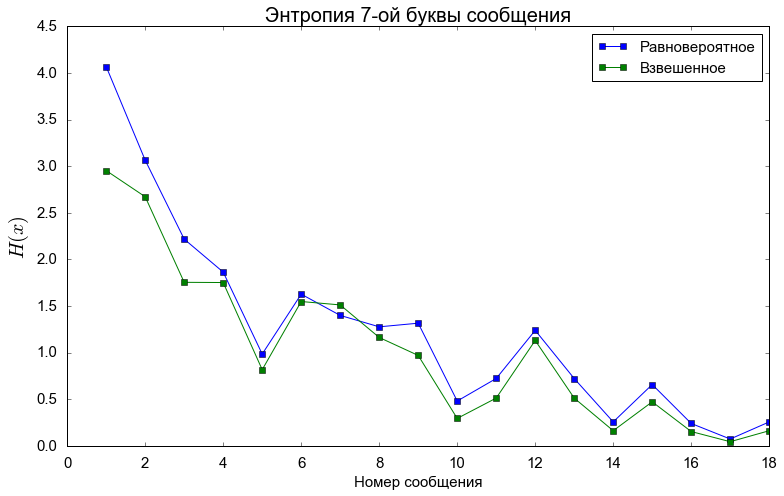

In [21]:
x = range(1, m+1)
h_u = []
h_w = []

for i in range(m):
    char_num = 7
    h_u.append(entropies[i][char_num])
    h_w.append(entropies_weight[i][char_num])
    
fig = plt.figure(figsize=(11,7))
plt.plot(x, h_u, marker='s', label='Равновероятное')
plt.plot(x, h_w, marker='s', label='Взвешенное')
plt.legend(fontsize=15)
plt.xlabel('Номер сообщения', fontsize=15)
plt.ylabel('$H(x)$', fontsize=20)
plt.tick_params(labelsize=15, pad=10)
plt.title('Энтропия {0}-ой буквы сообщения'.format(char_num, i + 1), fontsize=20)
plt.tight_layout()
#plt.savefig('./pics/entropy.png')
plt.show()
plt.close()


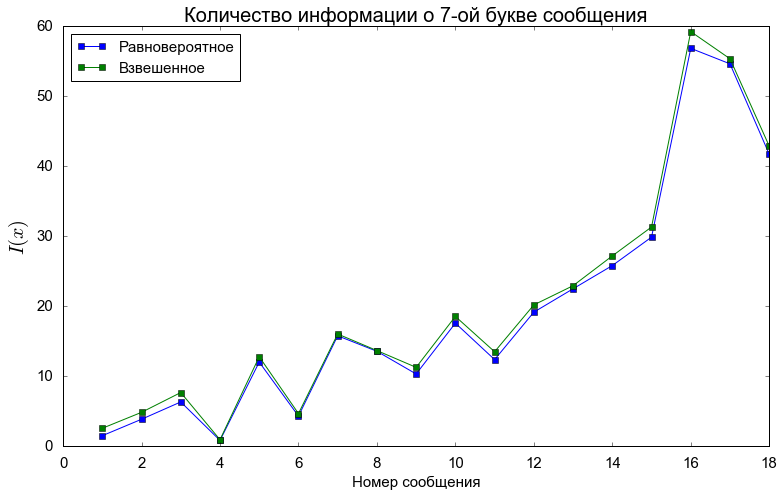

In [22]:
x = range(1, m+1)
i_u = []
i_w = []

for i in range(m):
    char_num = 7
    i_u.append(infos[i][char_num])
    i_w.append(infos_weight[i][char_num])
    
fig = plt.figure(figsize=(11,7))
plt.plot(x, i_u, marker='s', label='Равновероятное')
plt.plot(x, i_w, marker='s', label='Взвешенное')
plt.legend(fontsize=15, loc='upper left')
plt.xlabel('Номер сообщения', fontsize=15)
plt.ylabel('$I(x)$', fontsize=20)
plt.tick_params(labelsize=15, pad=10)
plt.title('Количество информации о {0}-ой букве сообщения'.format(char_num, i + 1), fontsize=20)
plt.tight_layout()
#plt.savefig('./pics/entropy.png')
plt.show()
plt.close()


Средняя условная энтропия $H(X|Y)$ и среднее количество информации $I(X|Y)$: 

In [23]:
char_num = 7

msgs = []
for i in range(m):
    msgs.append(messages[i][char_num])

print('H_uniform(X|Y) = {h}'.format(h=find_avg_entropy(alphabet, priori, msgs)))
print('I_uniform(X|Y) = {i}'.format(i=find_avg_info(alphabet, priori, msgs)))
print('H_weighted(X|Y) = {h}'.format(h=find_avg_entropy(alphabet, priori_weight, msgs)))
print('I_weighted(X|Y) = {i}'.format(i=find_avg_info(alphabet, priori_weight, msgs)))

H_uniform(X|Y) = 0.8616924025101422
I_uniform(X|Y) = 5.58125109333858
H_weighted(X|Y) = 1.2354422110832057
I_weighted(X|Y) = 4.794408292979068


### Часть 2 Передача сообщения путем многократного дублирования

#### Все символы равновероятны

In [24]:
long_alphabet = alphabet.copy()

for key in long_alphabet.keys():
    long_alphabet[key] = long_alphabet[key] * 18

In [25]:
def get_char_long(code: str):
    """Найти символ по его двоичному коду"""
    for key, value in long_alphabet.items():
        if value == code:
            return key


In [26]:
long_chars = []  # вероятности появления каждого j-ого символа инициализируем априорными вероятностями
long_entropies = []  # значения энтропий каждого j-ого символа
long_infos = []  # значения кол-ва информации об j-ом символе
for j in range(s):
    char = priori.copy()
    long_chars.append(char)

for j in range(s):  # для каждой буквы в сообщении
    long_char = ''
    for i in range(m):  # для каждого сообщения
        long_char = long_char + messages[i][j]
    long_chars[j] = find_posterior_probs(long_alphabet, long_chars[j], long_char)
    long_entropies.append(find_cond_entropy(long_alphabet, long_chars[j], long_char))
    long_infos.append(find_info(long_alphabet, long_chars[j], long_char))

In [27]:
for j in range(s):
    max_char = find_max(long_chars[j])
    print(max_char, end='')
print()

Я, Дьячтов Вадим, из группы 23501_4, возможно скоро получу зачет по теории вероятностей у Никитина Кирилла Вячеславовича. Для этого потребуется прорешать эти простейшие задачи и сделать 2-3 расчетных задания. Я сделаю это!


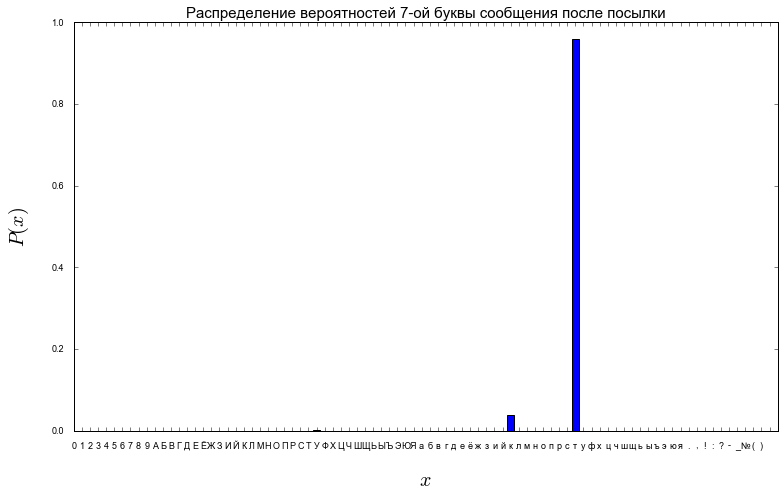

In [28]:
import matplotlib.pyplot as plt
from matplotlib import rc

font = {'family': 'Arial', 'weight': 'normal'}
rc('font', **font)

char_num = 7
curr = long_chars[char_num]

sorted_keys = get_sorted_keys()
sorted_values = []
for key in sorted_keys:
    sorted_values.append(curr[key])

fig = plt.figure(figsize=(11, 7))
plt.bar(range(len(alphabet)), sorted_values, align='center')
plt.xticks(range(len(curr)), sorted_keys)
plt.xlabel('$x$', fontsize=20, labelpad=20)
plt.ylabel('$P(x)$', fontsize=20, labelpad=20)
plt.tick_params(labelsize=9, pad=10)
plt.title('Распределение вероятностей {0}-ой буквы сообщения после посылки'.format(char_num), fontsize=15)
plt.tight_layout()
plt.xlim([0, len(curr)])
plt.ylim([0, 1])
plt.tight_layout()
#plt.savefig('./pics/uniform{i}.png'.format(i=i+1))
plt.show()
plt.close(fig)

#### Вероятности задаются исходя из частоты встречания букв в русском языке

In [29]:
long_chars_weight = []  # вероятности появления каждого j-ого символа инициализируем априорными вероятностями
long_entropies_weight = []  # значения энтропий каждого j-ого символа
long_infos_weight = []  # значения кол-ва информации об j-ом символе
for j in range(s):
    char = priori_weight.copy()
    long_chars_weight.append(char)

for j in range(s):  # для каждой буквы в сообщении
    long_char = ''
    for i in range(m):  # для каждого сообщения
        long_char = long_char + messages[i][j]
    long_entropies_weight.append(find_cond_entropy(long_alphabet, long_chars_weight[j], long_char))
    long_infos_weight.append(find_info(long_alphabet, long_chars_weight[j], long_char))
    long_chars_weight[j] = find_posterior_probs(long_alphabet, long_chars_weight[j], long_char)

In [30]:
for j in range(s):
    max_char = find_max(long_chars[j])
    print(max_char, end='')
print()

Я, Дьячтов Вадим, из группы 23501_4, возможно скоро получу зачет по теории вероятностей у Никитина Кирилла Вячеславовича. Для этого потребуется прорешать эти простейшие задачи и сделать 2-3 расчетных задания. Я сделаю это!


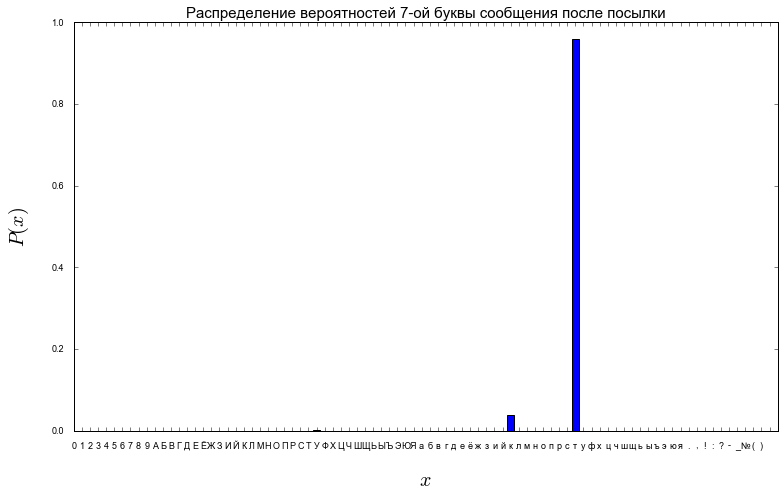

In [31]:
import matplotlib.pyplot as plt
from matplotlib import rc

font = {'family': 'Arial', 'weight': 'normal'}
rc('font', **font)

char_num = 7
curr = long_chars[char_num]

sorted_keys = get_sorted_keys()
sorted_values = []
for key in sorted_keys:
    sorted_values.append(curr[key])

fig = plt.figure(figsize=(11, 7))
plt.bar(range(len(alphabet)), sorted_values, align='center')
plt.xticks(range(len(curr)), sorted_keys)
plt.xlabel('$x$', fontsize=20, labelpad=20)
plt.ylabel('$P(x)$', fontsize=20, labelpad=20)
plt.tick_params(labelsize=9, pad=10)
plt.title('Распределение вероятностей {0}-ой буквы сообщения после посылки'.format(char_num), fontsize=15)
plt.tight_layout()
plt.xlim([0, len(curr)])
plt.ylim([0, 1])
plt.tight_layout()
#plt.savefig('./pics/uniform{i}.png'.format(i=i+1))
plt.show()
plt.close(fig)

#### 2.2. Расчет энтропии и количества информации

In [32]:
char_num = 7
print(long_entropies[char_num])
print(long_entropies_weight[char_num])

0.017774318982661796
0.1618074336624431


In [33]:
print(long_infos[char_num])
print(long_infos_weight[char_num])

-0.017774318982661796
-0.1618074336624431


In [34]:
char_num = 7

msgs = []
for j in range(s):  # для каждой буквы в сообщении
    long_char = ''
    for i in range(m):  # для каждого сообщения
        long_char = long_char + messages[i][j]
    msgs.append(long_char)

print('H_uniform(X|Y) = {h}'.format(h=find_avg_entropy(long_alphabet, priori, msgs)))
print('I_uniform(X|Y) = {i}'.format(i=find_avg_info(long_alphabet, priori, msgs)))
print('H_weighted(X|Y) = {h}'.format(h=find_avg_entropy(long_alphabet, priori_weight, msgs)))
print('I_weighted(X|Y) = {i}'.format(i=find_avg_info(long_alphabet, priori_weight, msgs)))

H_uniform(X|Y) = 0.016388735257036064
I_uniform(X|Y) = 6.426554760591687
H_weighted(X|Y) = 0.01844609666267513
I_weighted(X|Y) = 6.011404407399599
